In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-merged-data/app_train_merge_bureau.csv
/kaggle/input/final-merged-data/final_merged_table.csv


In [2]:
final = pd.read_csv("../input/final-merged-data/final_merged_table.csv")

In [3]:
encoded_cat = final.filter(regex = "^FLAG_").select_dtypes(np.number)
city = final.filter(regex = "CITY_")

# SELECT CATEGORICAL FEATURES

In [4]:
from sklearn.preprocessing import OrdinalEncoder
def prepare_categorical(x):
    oe = OrdinalEncoder()
    oe.fit(x)
    x_new = oe.transform(x)
    return x_new

In [5]:
cat = final.select_dtypes(include = object)
encoded = prepare_categorical(final[cat.columns])
for i in range(len(cat.columns)):
    cat[cat.columns[i]] = encoded[: ,i]
cat = pd.concat([cat, encoded_cat, city], axis = 1)
cat

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,5.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
target = final["TARGET"]
features = cat.fillna(cat.max() + 1, downcast='infer')
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(features, target)
list(features.columns[selector.get_support()])

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [7]:
pd.Series(index = features.columns, data = selector.pvalues_).sort_values(ascending = True)

ORGANIZATION_TYPE              0.000000e+00
NAME_INCOME_TYPE              2.537261e-205
HOUSETYPE_MODE                5.156737e-161
REG_CITY_NOT_WORK_CITY        7.571021e-136
CODE_GENDER                   9.985791e-134
EMERGENCYSTATE_MODE           4.938018e-124
REG_CITY_NOT_LIVE_CITY        1.604975e-123
NAME_EDUCATION_TYPE           7.245723e-108
OCCUPATION_TYPE                8.122390e-84
LIVE_CITY_NOT_WORK_CITY        5.686613e-60
NAME_CONTRACT_TYPE             1.038579e-59
NAME_HOUSING_TYPE              1.018930e-57
FLAG_DOCUMENT_6                8.003501e-52
WALLSMATERIAL_MODE             2.106698e-48
FLAG_WORK_PHONE                1.778407e-45
FLAG_DOCUMENT_3                4.986738e-40
FLAG_PHONE                     4.387368e-29
FLAG_OWN_CAR                   7.333211e-23
FONDKAPREMONT_MODE             9.113068e-17
FLAG_DOCUMENT_13               1.436313e-10
FLAG_DOCUMENT_16               1.467559e-10
FLAG_DOCUMENT_14               1.602932e-07
FLAG_DOCUMENT_18               1

<AxesSubplot:>

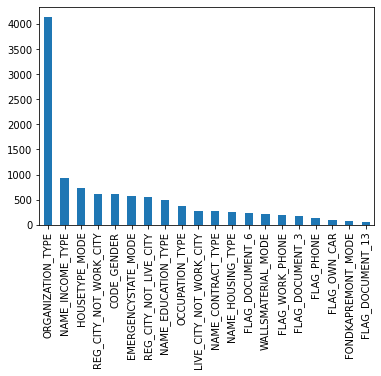

In [8]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")

# SELECTING NUMERIC FEATURES

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numeric = final.select_dtypes(include = np.number).drop(["Unnamed: 0", "SK_ID_CURR", "TARGET", "SK_ID_PREV", "DEBT_OVER_CREDIT", "SK_DPD_mean_pos", "SK_DPD_DEF_mean_pos"], axis = 1)
target = final["TARGET"]
features = numeric.fillna(numeric.mean(), downcast='infer').round(3)
features = features.drop(encoded_cat.columns, axis = 1)
features = features.drop(city.columns, axis = 1)
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(features, target)
selected = list(features.columns[selector.get_support()])
selected

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_CREDIT_UPDATE',
 'log_AMT_CREDIT_prev',
 'HOUR_APPR_PROCESS_START_prev',
 'DAYS_DECISION_prev',
 'CNT_PAYMENT_prev',
 'DAYS_FIRST_DUE_prev',
 'DAYS_TERMINATION_prev']

In [10]:
scores = selector.scores_

In [11]:
scores

array([1.13249930e+02, 4.87571051e+00, 2.83875387e+02, 5.05208606e+01,
       4.28093978e+02, 1.89397609e+03, 6.22071742e+02, 5.42753029e+02,
       8.16396507e+02, 1.34008685e+02, 2.66432852e+01, 1.07049125e+03,
       1.79686319e+02, 9.56110796e+00, 1.48195976e+01, 2.44455081e+00,
       3.05386216e+03, 8.11017452e+03, 7.81066362e+03, 1.16365002e+02,
       5.83709410e+01, 1.27711388e+01, 4.43452996e+01, 2.69278316e+01,
       1.45281037e+02, 4.80787137e+01, 2.62714877e+02, 9.65474602e+01,
       1.33863401e+01, 7.44573961e-01, 2.27656901e+01, 2.55977889e+01,
       3.19606416e+02, 3.00620075e+02, 9.40487178e+02, 1.91859362e-01,
       1.86734503e+00, 1.49144663e-01, 3.96959951e+01, 1.05198838e+00,
       1.01448890e+02, 5.53658904e+02, 1.06183227e+00, 1.00889820e+02,
       1.00355762e-01, 3.04214079e+01, 1.20786801e+03, 1.58003615e-01,
       1.29245660e+01, 5.00499367e+01, 4.16516351e+00,            nan,
       2.04479085e+01, 1.81560309e+01, 1.82518738e+01, 3.68670916e+00,
      

<AxesSubplot:>

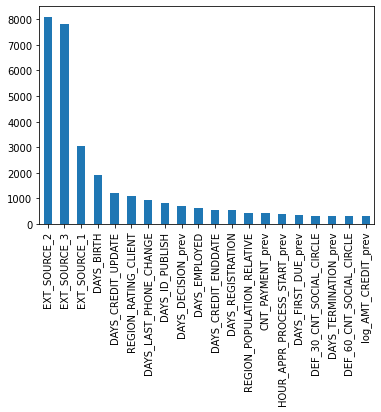

In [12]:
pd.Series(index = features.columns, data = selector.scores_).sort_values(ascending = False)[0:20].plot(kind = "bar")

In [13]:
final.filter(regex = "credit")

,SK_DPD_avg_credit_card,SK_DPD_DEF_avg_credit_card,AMT_BALANCE_avg_credit_card,AMT_CREDIT_LIMIT_ACTUAL_avg_credit_card,AMT_DRAWINGS_CURRENT_avg_credit_card,AMT_DRAWINGS_OTHER_CURRENT_avg_credit_card,AMT_DRAWINGS_POS_CURRENT_avg_credit_card,AMT_PAYMENT_CURRENT_avg_credit_card,CNT_DRAWINGS_ATM_CURRENT_max_credit_card,CNT_DRAWINGS_CURRENT_max_credit_card,CNT_DRAWINGS_OTHER_CURRENT_max_credit_card,CNT_INSTALMENT_MATURE_CUM_max_credit_card
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
